# Metropolis with Logistic Regression

We run the Metropolis algorithm on a small logistic regression data set, Table 3.1 in Gelman BDA.

A total of 20 animals were given four doses of a potentially toxic compound (five animals each dose). The dosage (on a log scale) and number of deaths are as follows.

In [3]:
import numpy as np
dosage = np.array([-0.86,-0.3,-0.05,0.73]) ## log scale
deaths = np.array([0.0,1.0,3.0,5.0])

So 3 out of 5 animals receiving a dose of $-0.05$ died.

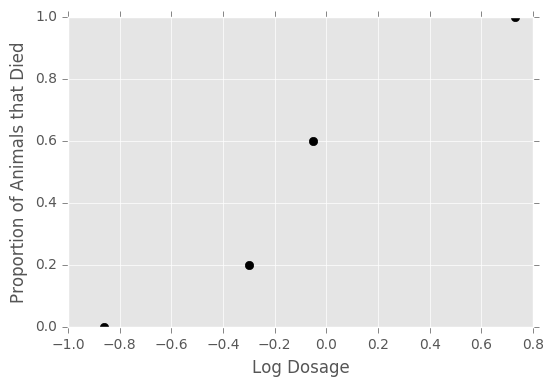

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(dosage, deaths/5, 'o', color='black');
plt.xlabel("Log Dosage");
plt.ylabel("Proportion of Animals that Died");

I would not go near this substance.

## Set Up Model, Prior, Likelihood, and Posterior

We model the dose reponse relation with logistic regression. There are two parameters $\beta_0$ and $\beta_1$. Following the BDA textbook, we use a logistic regression model with a "flat", improper prior on the parameters. The flat prior says that
$$\pi(\beta_1,\beta_2) = 1.$$

This prior is not actually a probability density. So the interpretation that the prior reflects our belief about the parameters before seeing the data is no longer valid. Additionally there is no guarantee that the nominal posterior ($\pi(\beta|x)$) is even a distribution.

When using an improper prior, one should always check that the posterior is actually a distribution by verifying that the normalizing constant $m(x) = \int f(x|\beta)\pi(\beta) d\beta$ is finite.

I am personally not a big fan of improper priors for the reasons above, but they are popular in Bayesian analysis.

We refer back to previous lectures on logistic regression for model background.

In [5]:
n = np.size(dosage)
X = np.column_stack((np.ones(n),dosage))

In [6]:
print(n)
print(X)

4
[[ 1.   -0.86]
 [ 1.   -0.3 ]
 [ 1.   -0.05]
 [ 1.    0.73]]


In [7]:
## computes the p_i for any x_i and beta
def logistic(x,beta):
    return( 1 / (1+np.exp(-np.sum(x*beta))))

In [8]:
beta = np.array([1.,1.])

In [9]:
## note: this is not a well written function because
##       1. X,deaths,and 5 should be arguments
##       2. better to compute the log of the posterior and then
##          compute np.exp(logpost(new) - logpost(current)) in Metropolis
##          this is more stable
def posterior(beta):
    p = np.apply_along_axis(lambda y: logistic(y,beta),1,X)
    return np.prod(np.power(p,deaths)*np.power(1-p,5-deaths))

In [10]:
posterior(beta)

2.272249189846101e-06

In [11]:
deaths

array([0., 1., 3., 5.])

In [12]:
Niter = 10000
chain = np.zeros(Niter*2).reshape((Niter,2))

In [13]:
for ii in np.arange(Niter-1):
        prop = chain[ii] + np.random.normal(loc=0.0,scale=0.05,size=2)
        if (posterior(prop) / posterior(chain[ii])) > np.random.uniform():
            chain[ii+1] = prop
        else:
            chain[ii+1] = chain[ii]

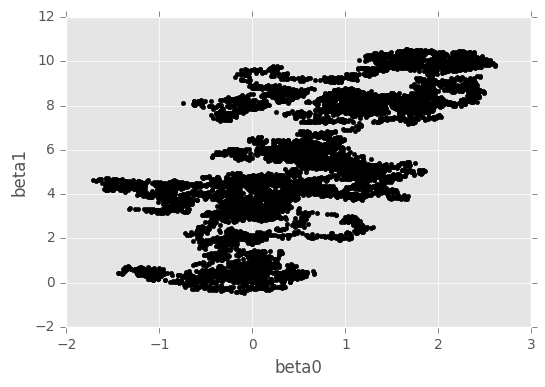

In [14]:
plt.plot(chain[:,0], chain[:,1], '.', color='black');
plt.xlabel("beta0");
plt.ylabel("beta1");

## Changing Proposal Standard Deviation

Based on the above plot, the proposal distribution standard deviation is far to small. Need more on the order of 1 for beta0 and 4 for beta1.

In [15]:
np.random.normal(loc=0.0,scale=[1.0,4.0],size=2)

array([ 0.12611775, -3.19320132])

In [16]:
## an simple implementation Metropolis Hastings algorithm
np.random.seed(1)
Niter = 10000
chain = np.zeros(Niter*2).reshape((Niter,2))

for ii in np.arange(Niter-1):
        prop = chain[ii] + np.random.normal(loc=0.0,scale=[1.0,4.0],size=2)
        if (posterior(prop) / posterior(chain[ii])) > np.random.uniform():
            chain[ii+1] = prop
        else:
            chain[ii+1] = chain[ii]


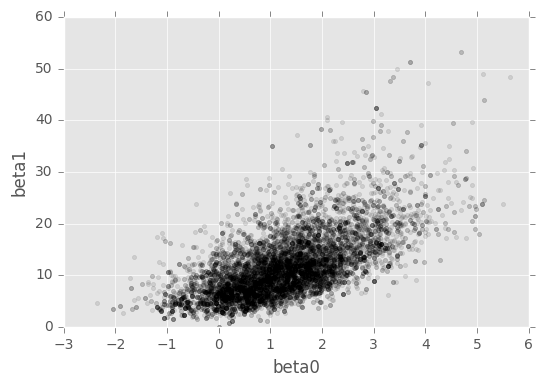

In [17]:
plt.plot(chain[:,0], chain[:,1], '.', color='black',alpha=0.1);
plt.xlabel("beta0");
plt.ylabel("beta1");

## Examining Burn In Time

Examine beginning of chain.

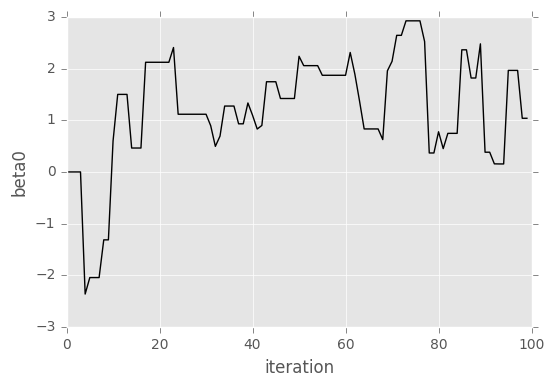

In [18]:
plt.plot(np.arange(100),chain[:100,0], color='black');
plt.xlabel("iteration");
plt.ylabel("beta0");

$\beta_0$ appears approximately converged after 100 iterations.

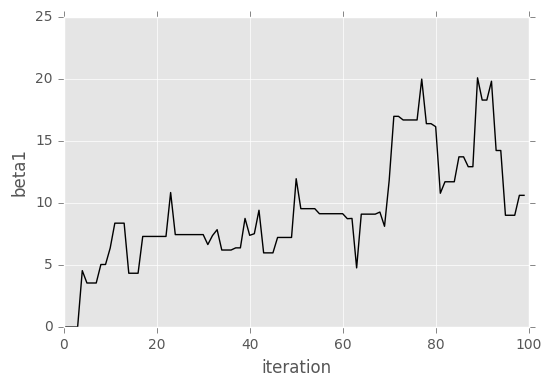

In [19]:
plt.plot(np.arange(100),chain[:100,1], color='black');
plt.xlabel("iteration");
plt.ylabel("beta1");

$\beta_1$ perhaps has not yet converged at 100 iterations.

We should probably drop the first 1000 or so iterations, the burn in period. Before we do this we create a second chain and observe when the chains have mixed.

## Monitoring Mixing

Lets make a second chain, starting from a very different position.



In [20]:
np.random.seed(1)
Niter = 10000
chain2 = np.zeros(Niter*2).reshape((Niter,2))
chain2[0,:] = [6,60]

In [21]:
for ii in np.arange(Niter-1):
        prop = chain2[ii] + np.random.normal(loc=0.0,scale=[1.0,4.0],size=2)
        if (posterior(prop) / posterior(chain2[ii])) > np.random.uniform():
            chain2[ii+1] = prop
        else:
            chain2[ii+1] = chain2[ii]

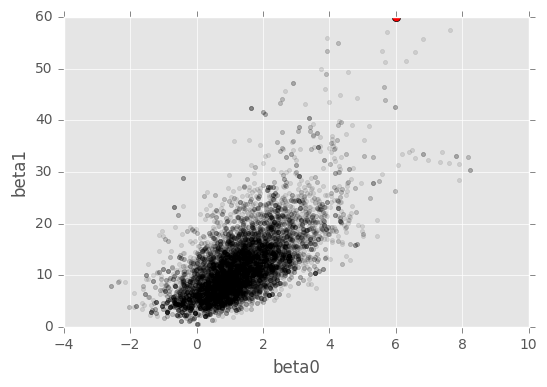

In [22]:
plt.plot(chain2[:,0],chain2[:,1], '.', color='black',alpha=0.1);
plt.plot(chain2[0,0],chain2[0,1],'o',color='red');
plt.xlabel("beta0");
plt.ylabel("beta1");

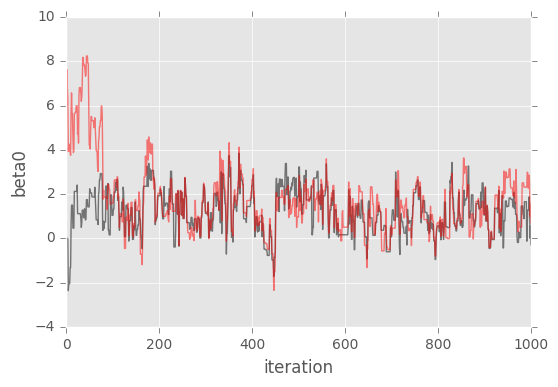

In [29]:
n = 1000
plt.plot(np.arange(n),chain[:n,0], color='black',alpha=0.5);
plt.plot(np.arange(n),chain2[:n,0], color='red',alpha=0.5);
plt.xlabel("iteration");
plt.ylabel("beta0");

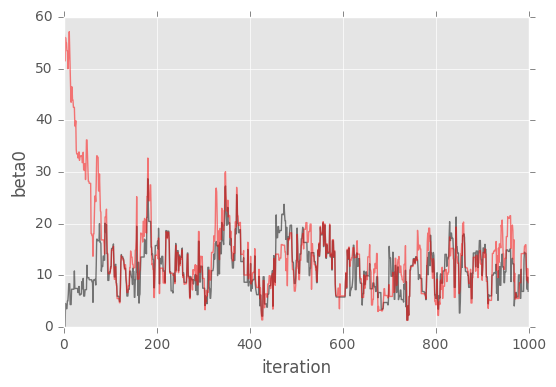

In [30]:
n = 1000
plt.plot(np.arange(n),chain[:n,1], color='black',alpha=0.5);
plt.plot(np.arange(n),chain2[:n,1], color='red',alpha=0.5);
plt.xlabel("iteration");
plt.ylabel("beta0");

Chains appear well mixed by iteration 500 or so. We can also view in two dimensions.

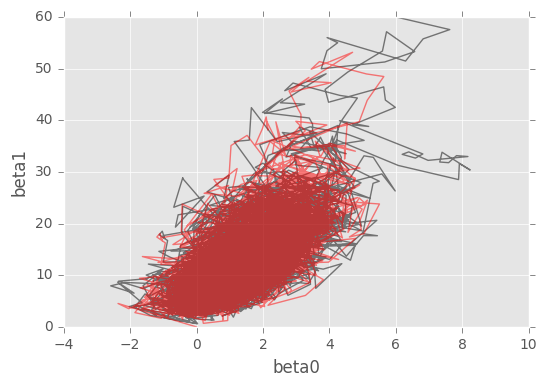

In [28]:
plt.plot(chain2[:,0],chain2[:,1], 'r-', color='black',alpha=0.5);
plt.plot(chain[:,0],chain[:,1], 'r-', color='red',alpha=0.5);
##plt.plot(chain2[0,0],chain2[0,1],'o',color='red');
plt.xlabel("beta0");
plt.ylabel("beta1");

Bayesian Data Analysis by Gelman **recommends** starting several chains in overdispersed locations (ie far from the center of mass), so that one can better assess convergence. There are more formal convergence diagnostics which we discuss later.

## Posterior Summaries

We will get rid of first 1000 iterations from the first chain.

In [233]:
chain = chain[1000:,:]

In [234]:
chain.shape

(9000, 2)

The posterior means are:

In [235]:
beta0pm = np.mean(chain[:,0])
beta1pm = np.mean(chain[:,1])

In [236]:
print(beta0pm)
print(beta1pm)
betapm = np.array([beta0pm,beta1pm])

1.2732797783935712
11.707552932901784


In [237]:
x = np.linspace(np.min(dosage),np.max(dosage))
X = np.column_stack((np.ones(np.size(x)),x))
p = np.apply_along_axis(lambda y: logistic(y,betapm),1,X)

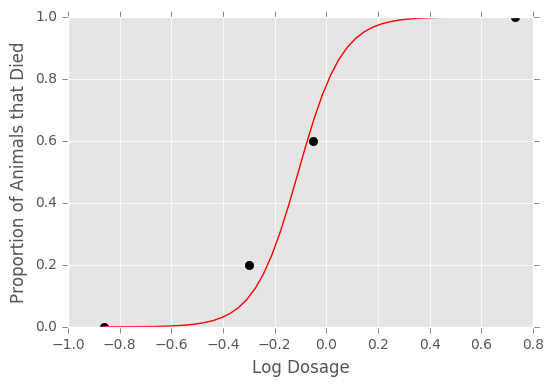

In [238]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(dosage, deaths/5, 'o', color='black');
plt.plot(x,p,color='red');
plt.xlabel("Log Dosage");
plt.ylabel("Proportion of Animals that Died");

We plot 1000 draws from the posterior, every 9th. We do not plot all 9000 because the plot gets crowded. It is better to select every 9th, rather than 1000 consecutive samples, because this minimizes correlation between samples.

In [239]:
chains_to_plot = chain[np.arange(1000)*9]

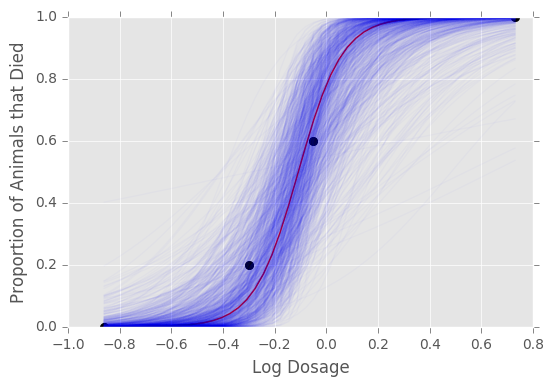

In [240]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(dosage, deaths/5, 'o', color='black');
p = np.apply_along_axis(lambda y: logistic(y,betapm),1,X)
plt.plot(x,p,color='red');
for ii in chains_to_plot:
    p = np.apply_along_axis(lambda y: logistic(y,ii),1,X)
    plt.plot(x,p,color='blue',alpha=0.02);
plt.xlabel("Log Dosage");
plt.ylabel("Proportion of Animals that Died");